In [26]:
import pandas as pd
import numpy as np


In [27]:
file ="F:/abcdef/dataset.csv"
df = pd.read_csv(file)
print(df)

     AGE  FEMALE  LOS  RACE  APRDRG  TOTCHG
0     17       1    2   1.0     560    2660
1     17       0    2   1.0     753    1689
2     17       1    7   1.0     930   20060
3     17       1    1   1.0     758     736
4     17       1    1   1.0     754    1194
..   ...     ...  ...   ...     ...     ...
495    0       1    6   1.0     636    5881
496    0       1    2   1.0     640    1171
497    0       1    2   1.0     640    1171
498    0       1    2   1.0     640    1086
499    0       0    4   1.0     640    4931

[500 rows x 6 columns]


In [28]:
#x = df.iloc[:,0:-1]
x= df.drop('TOTCHG',axis=1)
y = df.iloc[:,-1].values

In [29]:
x

,AGE,FEMALE,LOS,RACE,APRDRG
0,17,1,2,1.0,560
1,17,0,2,1.0,753
2,17,1,7,1.0,930
3,17,1,1,1.0,758
4,17,1,1,1.0,754
...,...,...,...,...,...
495,0,1,6,1.0,636
496,0,1,2,1.0,640
497,0,1,2,1.0,640
498,0,1,2,1.0,640


In [30]:
y

array([ 2660,  1689, 20060,   736,  1194,  3305,  2205,  1167,   532,
        1363,  1245,  1656,  1379,  2346,  4006,  2181,   628,  2463,
        1956,  1802,  3188,  2129,  7421,  1122,  1173,  3625,  3908,
        3994,  1033,  2860,  3814,  1132,  1163,   610,  9530,  1268,
        2582,  1287,  6594,   909,  2530,  1534, 14243,  1699,  7298,
         636,   626,  3782,  1444,  1183,  3045,  3624,  6810,  1409,
        1211,  9606,  1411,   607,  2932,  5075,   762,  6329,  1226,
        8223,  1193,  1076, 17434,  1647,  3865,   628,   806, 29188,
        4717, 15129,  1085,  1607,  1499,  7648,  1527,  1483,  2844,
        3124,  1760,  1278,  1620,  1220,  1134,  1235,  1656,  4072,
        1393,   615,   779,  1385,  1224,  1779,  1526,   882,  2075,
       12042,  1309,  1290,  1280,  1719,  1102,  1543,  1174,  1105,
        1335,  1550,  2473,  1322,  2553,  2835,  1191,  1439,  1237,
        1265,  2280,  1096,  1156,  1199,  5615,  2518,   625,  1246,
        1821,  3101,

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')

In [39]:
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [40]:
best_regressor = grid_search.best_estimator_

In [41]:
print("Size of X_test:", x_test.shape)
print("Size of y_test:", y_test.shape)


Size of X_test: (100, 5)
Size of y_test: (100,)


In [49]:
# Use the best parameters found by GridSearchCV
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Create a new DecisionTreeRegressor with the best parameters
best_regressor = DecisionTreeRegressor(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)

# Fit the model to the training data with the best parameters
best_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred_best = best_regressor.predict(x_test)

# Evaluate the model
r2_score_best = best_regressor.score(x_test, y_test)
print(f'R^2 Score with Best Model: {r2_score_best}')


R^2 Score with Best Model: 0.7432524451653902


[Text(0.62, 0.9166666666666666, 'x[2] <= 5.5\nsquared_error = 16426742.68\nsamples = 400\nvalue = 2818.5'),
 Text(0.32, 0.75, 'x[4] <= 126.5\nsquared_error = 4769523.351\nsamples = 378\nvalue = 2243.516'),
 Text(0.08, 0.5833333333333334, 'x[4] <= 36.5\nsquared_error = 10144681.678\nsamples = 21\nvalue = 8016.476'),
 Text(0.04, 0.4166666666666667, 'squared_error = 4351396.0\nsamples = 2\nvalue = 12088.0'),
 Text(0.12, 0.4166666666666667, 'x[2] <= 2.5\nsquared_error = 8825839.568\nsamples = 19\nvalue = 7587.895'),
 Text(0.08, 0.25, 'squared_error = 5357501.576\nsamples = 11\nvalue = 6501.909'),
 Text(0.16, 0.25, 'x[1] <= 0.5\nsquared_error = 10206690.98\nsamples = 8\nvalue = 9081.125'),
 Text(0.12, 0.08333333333333333, 'squared_error = -8335998.75\nsamples = 5\nvalue = 9675.4'),
 Text(0.2, 0.08333333333333333, 'squared_error = 31870352.0\nsamples = 3\nvalue = 8090.667'),
 Text(0.56, 0.5833333333333334, 'x[4] <= 421.0\nsquared_error = 2423056.592\nsamples = 357\nvalue = 1903.93'),
 Text(0

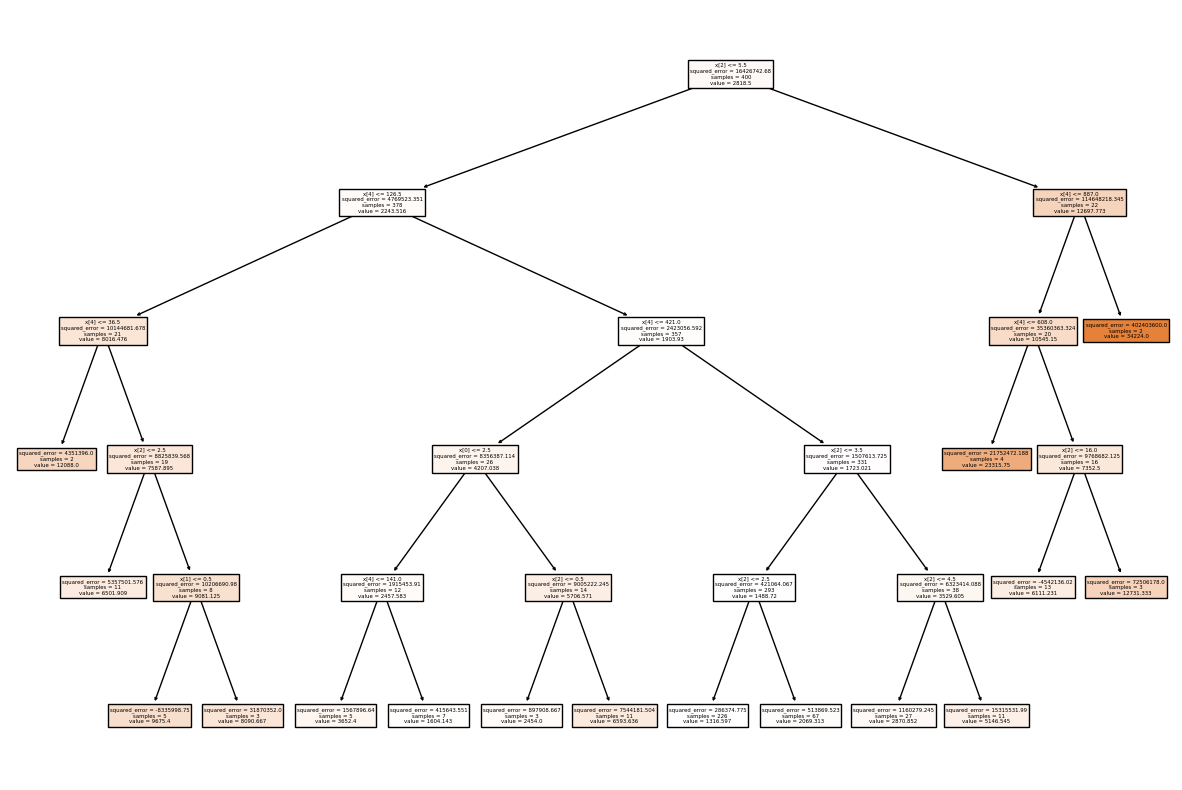

In [50]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_regressor,filled=True)